<a href="https://colab.research.google.com/github/John260260/Classification_problms_ML/blob/main/Sonar_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [50]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
from collections import Counter
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV, cross_val_score,train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import RandomForestClassifier
import xgboost
warnings.simplefilter(action='ignore', category=Warning)
pd.set_option('display.max_columns', None)
pd.set_option('precision',3)
%matplotlib inline

In [51]:
df=pd.read_csv('/content/drive/MyDrive/sonar.all-data.csv')

In [52]:
df.head()

,0.0200,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,0.2111,0.1609,0.1582,0.2238,0.0645,0.0660,0.2273,0.3100,0.2999,0.5078,0.4797,0.5783,0.5071,0.4328,0.5550,0.6711,0.6415,0.7104,0.8080,0.6791,0.3857,0.1307,0.2604,0.5121,0.7547,0.8537,0.8507,0.6692,0.6097,0.4943,0.2744,0.0510,0.2834,0.2825,0.4256,0.2641,0.1386,0.1051,0.1343,0.0383,0.0324,0.0232,0.0027,0.0065,0.0159,0.0072,0.0167,0.0180,0.0084,0.0090,0.0032,R
0,0.045,0.052,0.084,0.069,0.118,0.258,0.216,0.348,0.334,0.287,0.492,0.655,0.692,0.780,0.746,0.944,1.000,0.887,0.802,0.782,0.521,0.405,0.396,0.391,0.325,0.320,0.327,0.277,0.442,0.203,0.379,0.295,0.198,0.234,0.131,0.418,0.384,0.106,0.184,0.197,0.167,0.058,0.140,0.163,0.062,0.020,0.053,0.074,0.041,0.006,0.013,0.008,0.009,0.005,0.009,0.019,0.014,0.005,0.005,0.004,R
1,0.026,0.058,0.110,0.108,0.097,0.228,0.243,0.377,0.560,0.619,0.633,0.706,0.554,0.532,0.648,0.693,0.676,0.755,0.893,0.862,0.797,0.674,0.429,0.365,0.533,0.241,0.507,0.853,0.604,0.851,0.851,0.504,0.186,0.271,0.423,0.304,0.612,0.676,0.537,0.472,0.465,0.259,0.213,0.222,0.211,0.018,0.135,0.074,0.013,0.011,0.003,0.023,0.017,0.009,0.018,0.024,0.032,0.016,0.009,0.008,R
2,0.010,0.017,0.062,0.021,0.021,0.037,0.110,0.128,0.060,0.126,0.088,0.199,0.018,0.226,0.173,0.213,0.069,0.228,0.406,0.397,0.274,0.369,0.556,0.485,0.314,0.533,0.526,0.252,0.209,0.356,0.626,0.734,0.612,0.350,0.395,0.301,0.541,0.881,0.986,0.917,0.612,0.501,0.321,0.320,0.429,0.365,0.266,0.158,0.068,0.029,0.024,0.012,0.004,0.015,0.009,0.007,0.005,0.004,0.004,0.012,R
3,0.076,0.067,0.048,0.039,0.059,0.065,0.121,0.247,0.356,0.446,0.415,0.395,0.426,0.413,0.453,0.533,0.731,0.619,0.203,0.464,0.415,0.429,0.573,0.540,0.316,0.229,0.700,1.000,0.726,0.472,0.510,0.546,0.288,0.098,0.195,0.418,0.460,0.322,0.283,0.243,0.198,0.244,0.185,0.084,0.069,0.053,0.036,0.009,0.023,0.005,0.016,0.003,0.005,0.011,0.011,0.002,0.007,0.005,0.011,0.009,R
4,0.029,0.045,0.028,0.017,0.038,0.099,0.120,0.183,0.210,0.304,0.299,0.425,0.634,0.820,1.000,0.999,0.951,0.902,0.723,0.512,0.207,0.399,0.589,0.287,0.204,0.578,0.539,0.375,0.341,0.507,0.558,0.478,0.330,0.220,0.141,0.286,0.381,0.416,0.405,0.330,0.271,0.265,0.072,0.124,0.119,0.109,0.062,0.049,0.026,0.008,0.010,0.004,0.001,0.004,0.001,0.009,0.006,0.003,0.005,0.006,R


In [53]:
df.shape

(207, 61)

In [54]:
df.columns

Index(['0.0200', '0.0371', '0.0428', '0.0207', '0.0954', '0.0986', '0.1539',
       '0.1601', '0.3109', '0.2111', '0.1609', '0.1582', '0.2238', '0.0645',
       '0.0660', '0.2273', '0.3100', '0.2999', '0.5078', '0.4797', '0.5783',
       '0.5071', '0.4328', '0.5550', '0.6711', '0.6415', '0.7104', '0.8080',
       '0.6791', '0.3857', '0.1307', '0.2604', '0.5121', '0.7547', '0.8537',
       '0.8507', '0.6692', '0.6097', '0.4943', '0.2744', '0.0510', '0.2834',
       '0.2825', '0.4256', '0.2641', '0.1386', '0.1051', '0.1343', '0.0383',
       '0.0324', '0.0232', '0.0027', '0.0065', '0.0159', '0.0072', '0.0167',
       '0.0180', '0.0084', '0.0090', '0.0032', 'R'],
      dtype='object')

In [55]:
df.columns=["Col " +str(i) for i in range(1, 62)]

# https://www.listendata.com/2020/09/How-to-rename-columns-in-Pandas.html

In [56]:
df.columns

Index(['Col 1', 'Col 2', 'Col 3', 'Col 4', 'Col 5', 'Col 6', 'Col 7', 'Col 8',
       'Col 9', 'Col 10', 'Col 11', 'Col 12', 'Col 13', 'Col 14', 'Col 15',
       'Col 16', 'Col 17', 'Col 18', 'Col 19', 'Col 20', 'Col 21', 'Col 22',
       'Col 23', 'Col 24', 'Col 25', 'Col 26', 'Col 27', 'Col 28', 'Col 29',
       'Col 30', 'Col 31', 'Col 32', 'Col 33', 'Col 34', 'Col 35', 'Col 36',
       'Col 37', 'Col 38', 'Col 39', 'Col 40', 'Col 41', 'Col 42', 'Col 43',
       'Col 44', 'Col 45', 'Col 46', 'Col 47', 'Col 48', 'Col 49', 'Col 50',
       'Col 51', 'Col 52', 'Col 53', 'Col 54', 'Col 55', 'Col 56', 'Col 57',
       'Col 58', 'Col 59', 'Col 60', 'Col 61'],
      dtype='object')

In [ ]:
df.dtypes

In [58]:
df.tail(2)

,Col 1,Col 2,Col 3,Col 4,Col 5,Col 6,Col 7,Col 8,Col 9,Col 10,Col 11,Col 12,Col 13,Col 14,Col 15,Col 16,Col 17,Col 18,Col 19,Col 20,Col 21,Col 22,Col 23,Col 24,Col 25,Col 26,Col 27,Col 28,Col 29,Col 30,Col 31,Col 32,Col 33,Col 34,Col 35,Col 36,Col 37,Col 38,Col 39,Col 40,Col 41,Col 42,Col 43,Col 44,Col 45,Col 46,Col 47,Col 48,Col 49,Col 50,Col 51,Col 52,Col 53,Col 54,Col 55,Col 56,Col 57,Col 58,Col 59,Col 60,Col 61
205,0.030,0.035,0.049,0.061,0.017,0.135,0.146,0.112,0.195,0.235,0.290,0.281,0.158,0.027,0.067,0.144,0.207,0.265,0.283,0.429,0.569,0.699,0.725,0.762,0.924,1.0,0.998,0.83,0.703,0.714,0.689,0.496,0.258,0.097,0.078,0.036,0.157,0.182,0.135,0.085,0.049,0.137,0.155,0.155,0.132,0.099,0.126,0.095,0.049,0.024,0.004,0.009,0.005,0.013,0.004,0.004,0.003,0.008,0.004,0.005,M
206,0.026,0.036,0.014,0.027,0.021,0.034,0.066,0.140,0.184,0.235,0.272,0.244,0.167,0.034,0.130,0.171,0.218,0.318,0.371,0.455,0.570,0.740,0.806,0.884,0.943,1.0,0.938,0.76,0.712,0.836,0.762,0.457,0.172,0.155,0.164,0.187,0.266,0.171,0.096,0.077,0.085,0.208,0.251,0.186,0.144,0.147,0.099,0.004,0.015,0.012,0.018,0.015,0.013,0.005,0.004,0.006,0.004,0.004,0.006,0.011,M


In [59]:
df.loc[len(df.index)] = [0.0200, 0.0371, 0.0428, 0.0207, 0.0954, 0.0986, 0.1539,
       0.1601,0.3109,0.2111,0.1609,0.1582,0.2238,0.0645,
       0.0660,0.2273,0.3100,0.2999,0.5078,0.4797,0.5783,
       0.5071,0.4328,0.5550,0.6711,0.6415,0.7104,0.8080,
       0.6791,0.3857,0.1307,0.2604,0.5121,0.7547,0.8537,
       0.8507,0.6692,0.6097,0.4943,0.2744,0.0510,0.2834,
       0.2825,0.4256,0.2641,0.1386,0.1051,0.1343,0.0383,
       0.0324,0.0232,0.0027,0.0065,0.0159,0.0072,0.0167,
       0.0180,0.0084,0.0090,0.0032,'R'] 

In [60]:
df.tail(3)

,Col 1,Col 2,Col 3,Col 4,Col 5,Col 6,Col 7,Col 8,Col 9,Col 10,Col 11,Col 12,Col 13,Col 14,Col 15,Col 16,Col 17,Col 18,Col 19,Col 20,Col 21,Col 22,Col 23,Col 24,Col 25,Col 26,Col 27,Col 28,Col 29,Col 30,Col 31,Col 32,Col 33,Col 34,Col 35,Col 36,Col 37,Col 38,Col 39,Col 40,Col 41,Col 42,Col 43,Col 44,Col 45,Col 46,Col 47,Col 48,Col 49,Col 50,Col 51,Col 52,Col 53,Col 54,Col 55,Col 56,Col 57,Col 58,Col 59,Col 60,Col 61
205,0.030,0.035,0.049,0.061,0.017,0.135,0.146,0.112,0.195,0.235,0.290,0.281,0.158,0.027,0.067,0.144,0.207,0.265,0.283,0.429,0.569,0.699,0.725,0.762,0.924,1.000,0.998,0.830,0.703,0.714,0.689,0.496,0.258,0.097,0.078,0.036,0.157,0.182,0.135,0.085,0.049,0.137,0.155,0.155,0.132,0.099,0.126,0.095,0.049,0.024,0.004,0.009,0.005,0.013,0.004,0.004,0.003,0.008,0.004,0.005,M
206,0.026,0.036,0.014,0.027,0.021,0.034,0.066,0.140,0.184,0.235,0.272,0.244,0.167,0.034,0.130,0.171,0.218,0.318,0.371,0.455,0.570,0.740,0.806,0.884,0.943,1.000,0.938,0.760,0.712,0.836,0.762,0.457,0.172,0.155,0.164,0.187,0.266,0.171,0.096,0.077,0.085,0.208,0.251,0.186,0.144,0.147,0.099,0.004,0.015,0.012,0.018,0.015,0.013,0.005,0.004,0.006,0.004,0.004,0.006,0.011,M
207,0.020,0.037,0.043,0.021,0.095,0.099,0.154,0.160,0.311,0.211,0.161,0.158,0.224,0.065,0.066,0.227,0.310,0.300,0.508,0.480,0.578,0.507,0.433,0.555,0.671,0.641,0.710,0.808,0.679,0.386,0.131,0.260,0.512,0.755,0.854,0.851,0.669,0.610,0.494,0.274,0.051,0.283,0.282,0.426,0.264,0.139,0.105,0.134,0.038,0.032,0.023,0.003,0.006,0.016,0.007,0.017,0.018,0.008,0.009,0.003,R


In [61]:
df = df.sample(frac = 1)

In [62]:
df

,Col 1,Col 2,Col 3,Col 4,Col 5,Col 6,Col 7,Col 8,Col 9,Col 10,Col 11,Col 12,Col 13,Col 14,Col 15,Col 16,Col 17,Col 18,Col 19,Col 20,Col 21,Col 22,Col 23,Col 24,Col 25,Col 26,Col 27,Col 28,Col 29,Col 30,Col 31,Col 32,Col 33,Col 34,Col 35,Col 36,Col 37,Col 38,Col 39,Col 40,Col 41,Col 42,Col 43,Col 44,Col 45,Col 46,Col 47,Col 48,Col 49,Col 50,Col 51,Col 52,Col 53,Col 54,Col 55,Col 56,Col 57,Col 58,Col 59,Col 60,Col 61
78,0.011,8.600e-03,0.006,0.046,0.075,0.089,0.102,0.049,0.047,0.039,0.111,0.141,0.220,0.298,0.412,0.475,0.539,0.628,0.706,0.792,0.949,1.000,0.965,0.943,0.866,0.789,0.650,0.449,0.474,0.615,0.493,0.320,0.373,0.334,0.105,0.067,0.038,0.046,0.169,0.217,0.168,0.064,0.016,0.078,0.065,0.021,0.051,0.039,0.026,1.010e-02,1.610e-02,2.900e-03,7.800e-03,0.011,8.300e-03,5.800e-03,3.000e-04,2.300e-03,2.600e-03,2.700e-03,R
167,0.002,1.860e-02,0.029,0.019,0.051,0.082,0.101,0.012,0.117,0.148,0.212,0.258,0.235,0.133,0.009,0.195,0.368,0.465,0.542,0.626,0.742,0.826,0.861,0.840,0.895,0.995,1.000,0.965,0.875,0.626,0.218,0.294,0.364,0.501,0.784,0.936,0.820,0.621,0.451,0.300,0.267,0.224,0.314,0.369,0.299,0.223,0.085,0.036,0.029,1.220e-02,4.500e-03,1.080e-02,7.500e-03,0.009,3.600e-03,2.900e-03,1.300e-03,1.000e-03,3.200e-03,4.700e-03,M
126,0.021,2.610e-02,0.012,0.077,0.106,0.168,0.302,0.346,0.331,0.412,0.394,0.133,0.462,0.997,0.914,0.829,0.699,0.782,0.879,0.850,0.892,0.947,1.000,0.897,0.781,0.832,0.650,0.455,0.473,0.339,0.275,0.098,0.048,0.140,0.183,0.215,0.127,0.191,0.339,0.344,0.237,0.119,0.267,0.259,0.139,0.108,0.138,0.132,0.107,3.250e-02,3.160e-02,5.700e-03,1.590e-02,0.009,3.720e-02,1.010e-02,1.270e-02,2.880e-02,1.290e-02,2.300e-03,M
10,0.012,3.090e-02,0.017,0.031,0.036,0.010,0.018,0.058,0.112,0.084,0.055,0.085,0.203,0.256,0.187,0.203,0.146,0.285,0.582,0.773,0.785,0.852,0.531,0.365,0.597,0.828,1.000,0.867,0.630,0.459,0.394,0.258,0.282,0.264,0.276,0.270,0.399,0.458,0.394,0.252,0.178,0.135,0.052,0.034,0.089,0.086,0.087,0.044,0.013,2.170e-02,1.880e-02,1.330e-02,2.650e-02,0.022,7.400e-03,1.180e-02,2.600e-03,9.200e-03,9.000e-04,4.400e-03,R
112,0.028,5.990e-02,0.066,0.023,0.084,0.167,0.115,0.110,0.137,0.177,0.200,0.287,0.328,0.377,0.417,0.504,0.618,0.802,0.933,0.940,0.927,0.945,0.833,0.777,0.701,0.615,0.581,0.445,0.371,0.289,0.218,0.171,0.358,0.395,0.287,0.240,0.362,0.331,0.376,0.477,0.406,0.366,0.232,0.145,0.102,0.111,0.066,0.027,0.024,1.790e-02,1.090e-02,1.470e-02,1.700e-02,0.016,4.600e-03,7.300e-03,5.400e-03,3.300e-03,4.500e-03,7.900e-03,M
170,0.018,1.360e-02,0.041,0.063,0.060,0.081,0.209,0.346,0.528,0.597,0.625,0.451,0.369,0.286,0.164,0.042,0.178,0.439,0.695,0.810,0.855,0.872,0.860,0.920,0.873,0.808,0.869,0.841,0.579,0.375,0.348,0.464,0.649,0.690,0.567,0.519,0.506,0.389,0.376,0.374,0.261,0.159,0.188,0.227,0.158,0.121,0.088,0.085,0.035,2.190e-02,8.600e-03,1.230e-02,6.000e-03,0.019,1.110e-02,1.260e-02,8.100e-03,1.550e-02,1.600e-02,8.500e-03,M
158,0.024,2.200e-02,0.017,0.052,0.075,0.112,0.126,0.172,0.307,0.320,0.295,0.248,0.251,0.181,0.141,0.302,0.363,0.389,0.298,0.222,0.162,0.134,0.205,0.379,0.577,0.754,0.841,0.855,0.904,1.000,0.965,0.791,0.641,0.599,0.683,0.777,0.808,0.743,0.629,0.571,0.443,0.336,0.380,0.495,0.437,0.240,0.113,0.165,0.093,2.250e-02,2.140e-02,2.210e-02,1.520e-02,0.008,5.800e-03,2.300e-03,5.700e-03,5.200e-03,2.700e-03,2.100e-03,M
153,0.012,6.900e-03,0.028,0.058,0.091,0.127,0.158,0.193,0.236,0.217,0.118,0.075,0.278,0.376,0.509,0.659,0.707,0.753,0.836,0.859,0.962,0.984,0.871,0.640,0.507,0.539,0.693,0.849,0.821,0.596,0.295,0.276,0.288,0.189,0.145,0.096,0.089,0.084,0.089,0.155,0.232,0.223,0.103,0.172,0.202,0.179,0.111,0.040,0.030,8.400e-03,3.900e-03,5.300e-03,2.900e-03,0.002,1.300e-03,2.900e-03,2.000e-03,6.200e-03,2.600e-03,5.200e-03,M
199,0.013,3.870e-02,0.033,0.008,0.072,0.134,0.163,0.190,0.261,0.319,0.347,0.374,0.305,0.193,0.139,0.212,0.276,0.458,0.649,0.715,0.801,0.792,0.879,1.000,0.987,0.947,0.947,0.931,0.833,0.621,0.377,0.282,0.204,0.219,0.222,0.133,0.052,0.062,0.142,0.146,0.085,0.105,0.164,0.192,0.208,0.234,0.196,0.130,0.063,1

In [63]:
df.reset_index(drop=True, inplace=True)

In [65]:
Counter(df['Col 61'])

Counter({'M': 111, 'R': 97})

In [66]:
pd.set_option('display.max_rows', None)
df.isnull().sum()

Col 1     0
Col 2     0
Col 3     0
Col 4     0
Col 5     0
Col 6     0
Col 7     0
Col 8     0
Col 9     0
Col 10    0
Col 11    0
Col 12    0
Col 13    0
Col 14    0
Col 15    0
Col 16    0
Col 17    0
Col 18    0
Col 19    0
Col 20    0
Col 21    0
Col 22    0
Col 23    0
Col 24    0
Col 25    0
Col 26    0
Col 27    0
Col 28    0
Col 29    0
Col 30    0
Col 31    0
Col 32    0
Col 33    0
Col 34    0
Col 35    0
Col 36    0
Col 37    0
Col 38    0
Col 39    0
Col 40    0
Col 41    0
Col 42    0
Col 43    0
Col 44    0
Col 45    0
Col 46    0
Col 47    0
Col 48    0
Col 49    0
Col 50    0
Col 51    0
Col 52    0
Col 53    0
Col 54    0
Col 55    0
Col 56    0
Col 57    0
Col 58    0
Col 59    0
Col 60    0
Col 61    0
dtype: int64

In [67]:
#rows_with_Nan
#Nan_rows= df[df.isunll().any(axis=1)]

In [68]:
df.describe()

,Col 1,Col 2,Col 3,Col 4,Col 5,Col 6,Col 7,Col 8,Col 9,Col 10,Col 11,Col 12,Col 13,Col 14,Col 15,Col 16,Col 17,Col 18,Col 19,Col 20,Col 21,Col 22,Col 23,Col 24,Col 25,Col 26,Col 27,Col 28,Col 29,Col 30,Col 31,Col 32,Col 33,Col 34,Col 35,Col 36,Col 37,Col 38,Col 39,Col 40,Col 41,Col 42,Col 43,Col 44,Col 45,Col 46,Col 47,Col 48,Col 49,Col 50,Col 51,Col 52,Col 53,Col 54,Col 55,Col 56,Col 57,Col 58,Col 59,Col 60
count,208.000,2.080e+02,208.000,208.000,208.000,208.000,208.000,208.000,208.000,208.000,208.000,208.000,208.000,208.000,208.000,208.000,208.000,208.000,208.000,208.000,208.000,208.000,208.000,208.000,208.000,208.000,208.000,208.000,208.000,208.000,208.000,208.000,208.000,208.000,208.000,208.000,208.000,208.000,208.000,208.000,208.000,208.000,208.000,208.000,208.000,208.000,208.000,208.000,208.000,208.000,208.000,2.080e+02,2.080e+02,208.000,2.080e+02,2.080e+02,2.080e+02,2.080e+02,2.080e+02,2.080e+02
mean,0.029,3.844e-02,0.044,0.054,0.075,0.105,0.122,0.135,0.178,0.208,0.236,0.250,0.273,0.297,0.320,0.378,0.416,0.452,0.505,0.563,0.609,0.624,0.647,0.673,0.675,0.700,0.702,0.694,0.642,0.581,0.504,0.439,0.417,0.403,0.393,0.385,0.364,0.340,0.326,0.311,0.289,0.278,0.247,0.214,0.197,0.161,0.122,0.091,0.052,0.020,0.016,1.342e-02,1.071e-02,0.011,9.290e-03,8.222e-03,7.820e-03,7.949e-03,7.941e-03,6.507e-03
std,0.023,3.296e-02,0.038,0.047,0.056,0.059,0.062,0.085,0.118,0.134,0.133,0.140,0.141,0.164,0.205,0.233,0.264,0.262,0.258,0.263,0.258,0.256,0.250,0.239,0.245,0.237,0.246,0.237,0.240,0.221,0.214,0.213,0.207,0.231,0.259,0.264,0.240,0.213,0.199,0.179,0.171,0.169,0.139,0.133,0.152,0.134,0.087,0.062,0.036,0.014,0.012,9.634e-03,7.060e-03,0.007,7.088e-03,5.736e-03,5.785e-03,6.470e-03,6.181e-03,5.031e-03
min,0.002,6.000e-04,0.002,0.006,0.007,0.010,0.003,0.005,0.007,0.011,0.029,0.024,0.018,0.027,0.003,0.016,0.035,0.037,0.049,0.066,0.051,0.022,0.056,0.024,0.024,0.092,0.048,0.028,0.014,0.061,0.048,0.040,0.048,0.021,0.022,0.008,0.035,0.038,0.037,0.012,0.036,0.006,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,8.000e-04,5.000e-04,0.001,6.000e-04,4.000e-04,3.000e-04,3.000e-04,1.000e-04,6.000e-04
25%,0.013,1.645e-02,0.019,0.024,0.038,0.067,0.081,0.080,0.097,0.111,0.129,0.133,0.166,0.175,0.165,0.196,0.206,0.242,0.299,0.351,0.400,0.407,0.450,0.541,0.526,0.544,0.532,0.535,0.464,0.411,0.346,0.281,0.258,0.218,0.179,0.154,0.160,0.174,0.174,0.186,0.163,0.159,0.155,0.127,0.094,0.069,0.064,0.045,0.026,0.012,0.008,7.275e-03,5.075e-03,0.005,4.150e-03,4.400e-03,3.700e-03,3.600e-03,3.675e-03,3.100e-03
50%,0.023,3.080e-02,0.034,0.044,0.062,0.092,0.107,0.112,0.152,0.182,0.225,0.249,0.264,0.281,0.282,0.305,0.308,0.368,0.435,0.542,0.618,0.665,0.700,0.699,0.721,0.754,0.746,0.732,0.681,0.607,0.490,0.430,0.391,0.351,0.313,0.321,0.306,0.313,0.283,0.278,0.260,0.245,0.223,0.178,0.148,0.121,0.102,0.078,0.045,0.018,0.014,1.140e-02,9.550e-03,0.009,7.500e-03,6.850e-03,5.950e-03,5.800e-03,6.400e-03,5.300e-03
75%,0.036,4.795e-02,0.058,0.065,0.100,0.134,0.154,0.170,0.233,0.269,0.302,0.331,0.351,0.386,0.453,0.536,0.659,0.679,0.731,0.809,0.817,0.832,0.849,0.872,0.874,0.894,0.917,0.900,0.852,0.735,0.642,0.580,0.556,0.596,0.593,0.557,0.519,0.441,0.435,0.424,0.388,0.384,0.325,0.272,0.232,0.200,0.154,0.120,0.069,0.025,0.021,1.673e-02,1.490e-02,0.015,1.210e-02,1.058e-02,1.043e-02,1.035e-02,1.033e-02,8.525e-03
max,0.137,2.339e-01,0.306,0.426,0.401,0.382,0.373,0.459,0.683,0.711,0.734,0.706,0.713,0.997,1.000,0.999,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,0.966,0.931,1.000,0.965,1.000,1.000,0.950,1.000,0.986,0.930,0.899,0.825,0.773,0.776,0.703,0.729,0.552,0.334,0.198,0.083,0.100,7.090e-02,3.900e-02,0.035,4.470e-02,3.940e-02,3.550e-02,4.400e-02,3.640e-02,4.390e-02


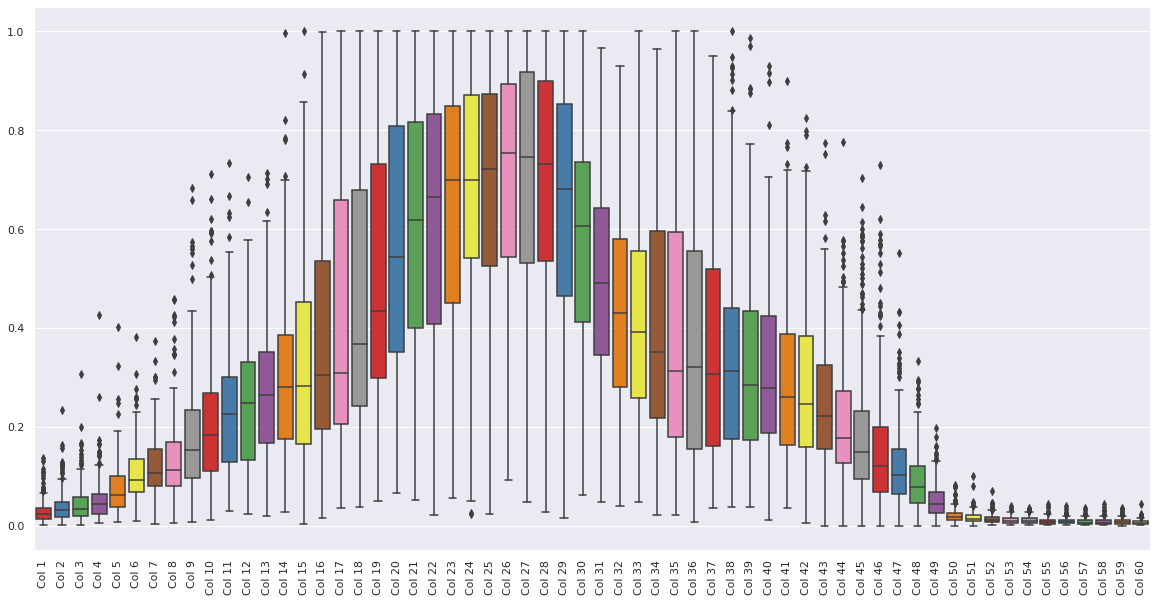

In [69]:
# Checking the outliers

sns.set()
plt.figure(figsize=(20,10))
sns.boxplot(data=df,palette='Set1')
plt.xticks(rotation=90)
plt.show()

In [70]:
df.shape

(208, 61)

In [71]:
df['Col 1'].std()

0.02299091393384707

In [72]:
df['Col 61']= df['Col 61'].replace(['M','R'],[0,1])

In [73]:
Counter(df['Col 61'])

Counter({0: 111, 1: 97})

In [76]:
#removing all outliers

#from scipy import stats
#df_new= df[(np.abs(stats.zscore(df)) < 3).all(axis=1)]
#df_new.shape

In [80]:
Counter (df_new['Col 61'])

Counter({0: 84, 1: 84})

In [81]:
df.groupby('Col 61').size()

Col 61
0    111
1     97
dtype: int64

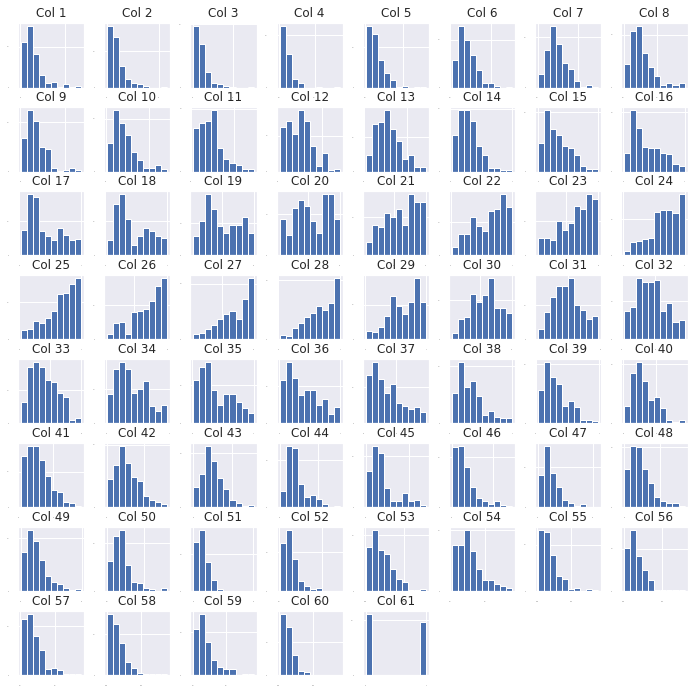

In [82]:
df.hist(sharex=False, sharey=False, xlabelsize=1, ylabelsize=1, figsize=(12,12))
plt.show()

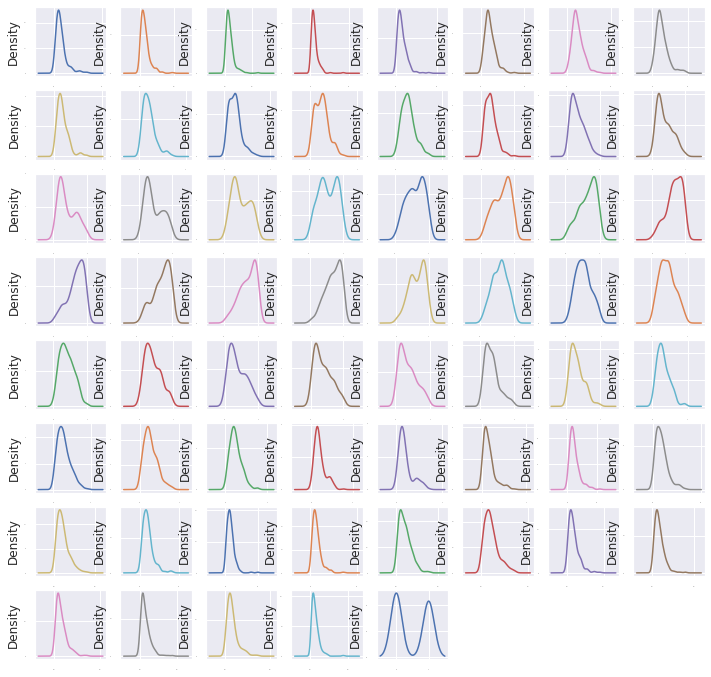

In [83]:
df.plot(kind='density', subplots=True, layout=(8,8), sharex=False, legend=False, fontsize=1,figsize=(12,12))
plt.show()

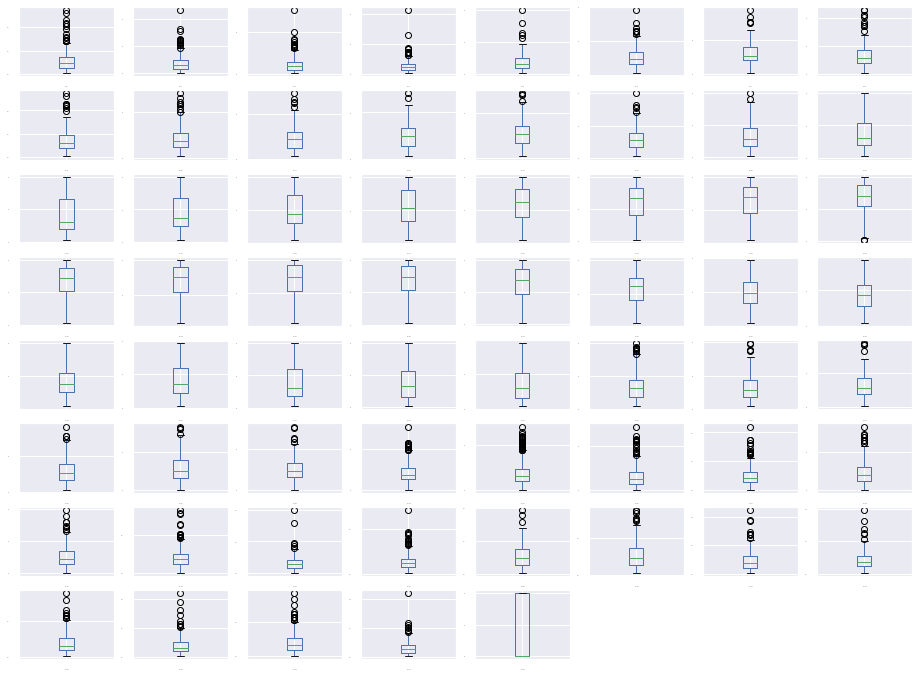

In [84]:
df.plot(kind='box', subplots=True, layout=(8,8), sharex=False, legend=False, fontsize=1,figsize=(16,12))
plt.show()

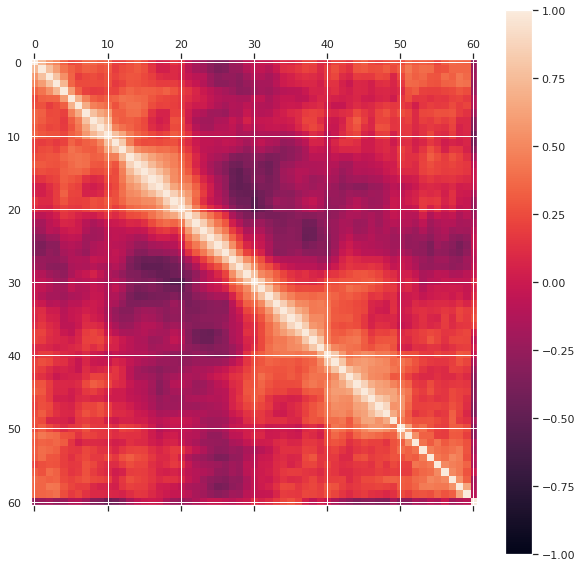

In [85]:
fig= plt.figure()
ax= fig.add_subplot(111)
cax= ax.matshow(df.corr(), vmin=-1, vmax=1, interpolation='none')
fig.colorbar(cax)
fig.set_size_inches(10,10)
plt.show()

###Evaluate Algorithams

In [87]:
array= df.values
X= array[:, 0:-1].astype(float)
Y= array[:, -1]
validation_size=0.2
seed=7
X_train,X_validation, Y_train, Y_validation= train_test_split(X,Y, test_size= validation_size, random_state=seed)

In [88]:
num_folds=10
seed= 7
scoring='accuracy'

In [90]:
models=[]
models.append(('LR', LogisticRegression()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC()))

In [92]:
results=[]
names=[]
for name, model in models:
  kfold= KFold(n_splits=num_folds, random_state=seed)
  cv_results=cross_val_score(model, X_train, Y_train, cv=kfold, scoring=scoring)
  results.append(cv_results)
  names.append(name)
  msg='%s: %f (%f)' % (name, cv_results.mean(), cv_results.std())
  print (msg)

LR: 0.751471 (0.097800)
KNN: 0.824265 (0.046294)
CART: 0.758824 (0.071236)
NB: 0.673897 (0.111015)
SVM: 0.800735 (0.066274)


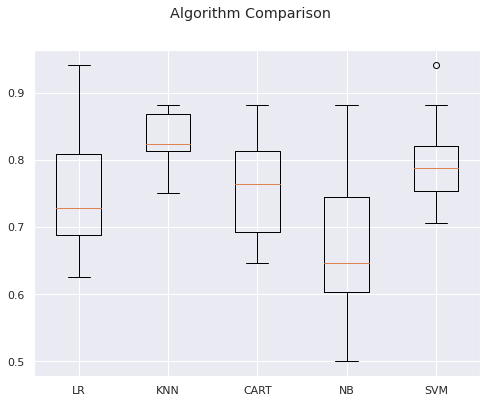

In [93]:
fig= plt.figure()
fig.suptitle('Algorithm Comparison')
ax=fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
fig.set_size_inches(8,6)
plt.show()

In [96]:
pipelines=[]
pipelines.append(('ScaledLR', Pipeline([('Scaler', StandardScaler()), ('LR', LogisticRegression())])))
pipelines.append(('ScaledKNN', Pipeline([('Scaler', StandardScaler()), ('KNN', KNeighborsClassifier())])))
pipelines.append(('ScaledCART', Pipeline([('Scaler', StandardScaler()), ('CART', DecisionTreeClassifier())])))
pipelines.append(('ScaledNB', Pipeline([('Scaler', StandardScaler()), ('NB', GaussianNB())])))
pipelines.append(('ScaledSVM', Pipeline([('Scaler', StandardScaler()), ('SVM', SVC())])))

In [97]:
results=[]
names=[]
for name, model in pipelines:
  kfold= KFold(n_splits=num_folds, random_state=seed)
  cv_results=cross_val_score(model, X_train, Y_train, cv=kfold, scoring=scoring)
  results.append(cv_results)
  names.append(name)
  msg='%s: %f (%f)' % (name, cv_results.mean(), cv_results.std())
  print (msg)

ScaledLR: 0.765074 (0.099121)
ScaledKNN: 0.788971 (0.081634)
ScaledCART: 0.740074 (0.093531)
ScaledNB: 0.673897 (0.111015)
ScaledSVM: 0.825000 (0.063491)


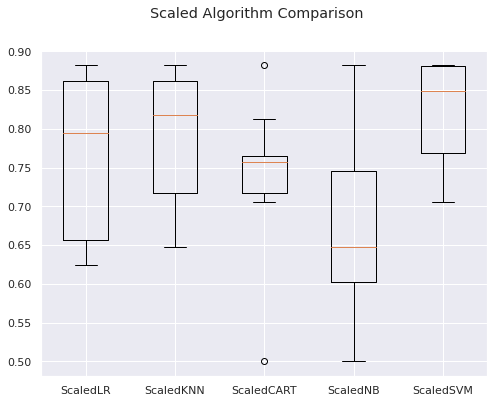

In [99]:
fig= plt.figure()
fig.suptitle('Scaled Algorithm Comparison')
ax=fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
fig.set_size_inches(8,6)
plt.show()

In [100]:
# Algorithm tuning

scaler= StandardScaler().fit(X_train)
rescaledX= scaler.transform(X_train)
neighbors=[1,3,5,7,9,11]
param_grid=dict(n_neighbors=neighbors)
model= KNeighborsClassifier()
kfold= KFold(n_splits=num_folds, random_state=seed)
grid= GridSearchCV(estimator=model, param_grid=param_grid, scoring=scoring, cv=kfold)
grid_result=grid.fit(rescaledX, Y_train)

In [101]:
print ('Best: %f using %s' % (grid_result.best_score_, grid_result.best_params_))
means= grid_result.cv_results_['mean_test_score']
stds= grid_result.cv_results_['std_test_score']
params=grid_result.cv_results_['params']
ranks=grid_result.cv_results_['rank_test_score']
for mean,stdev,param, rank in zip(means, stds,params, ranks):
  print('#%d %f (%f) with: %r' %(rank,mean, stdev, param))


Best: 0.861397 using {'n_neighbors': 1}
#1 0.861397 (0.079891) with: {'n_neighbors': 1}
#2 0.837132 (0.085466) with: {'n_neighbors': 3}
#3 0.783088 (0.084687) with: {'n_neighbors': 5}
#4 0.771691 (0.086603) with: {'n_neighbors': 7}
#6 0.729044 (0.054209) with: {'n_neighbors': 9}
#5 0.741912 (0.071909) with: {'n_neighbors': 11}


In [102]:
scaler= StandardScaler().fit(X_train)
rescaledX= scaler.transform(X_train)
c_values=[0.01,0.05,0.1,0.5,1.0,1.5,2]
kernel_values=['linear','poly','rbf','sigmond']
param_grid=dict(C=c_values, kernel=kernel_values)
model= SVC()
kfold= KFold(n_splits=num_folds, random_state=seed)
grid= GridSearchCV(estimator=model, param_grid=param_grid, scoring=scoring, cv=kfold)
grid_result=grid.fit(rescaledX, Y_train)

In [103]:
print ('Best: %f using %s' % (grid_result.best_score_, grid_result.best_params_))
means= grid_result.cv_results_['mean_test_score']
stds= grid_result.cv_results_['std_test_score']
params=grid_result.cv_results_['params']
ranks=grid_result.cv_results_['rank_test_score']
for mean,stdev,param, rank in zip(means, stds,params, ranks):
  print('#%d %f (%f) with: %r' %(rank,mean, stdev, param))

Best: 0.855882 using {'C': 1.5, 'kernel': 'rbf'}
#14 0.740074 (0.095773) with: {'C': 0.01, 'kernel': 'linear'}
#18 0.530882 (0.105703) with: {'C': 0.01, 'kernel': 'poly'}
#18 0.530882 (0.105703) with: {'C': 0.01, 'kernel': 'rbf'}
#26 nan (nan) with: {'C': 0.01, 'kernel': 'sigmond'}
#11 0.770588 (0.075349) with: {'C': 0.05, 'kernel': 'linear'}
#21 0.505147 (0.127486) with: {'C': 0.05, 'kernel': 'poly'}
#18 0.530882 (0.105703) with: {'C': 0.05, 'kernel': 'rbf'}
#24 nan (nan) with: {'C': 0.05, 'kernel': 'sigmond'}
#12 0.758088 (0.083105) with: {'C': 0.1, 'kernel': 'linear'}
#17 0.541912 (0.167481) with: {'C': 0.1, 'kernel': 'poly'}
#16 0.596691 (0.134048) with: {'C': 0.1, 'kernel': 'rbf'}
#22 nan (nan) with: {'C': 0.1, 'kernel': 'sigmond'}
#15 0.734191 (0.107828) with: {'C': 0.5, 'kernel': 'linear'}
#13 0.751103 (0.140891) with: {'C': 0.5, 'kernel': 'poly'}
#7 0.776838 (0.085640) with: {'C': 0.5, 'kernel': 'rbf'}
#23 nan (nan) with: {'C': 0.5, 'kernel': 'sigmond'}
#9 0.770588 (0.109620) w

In [105]:
ensembles=[]
ensembles.append(('AB', AdaBoostClassifier()))
ensembles.append(('RF', RandomForestClassifier()))
ensembles.append(('XGB', xgboost.XGBClassifier()))

In [106]:
results=[]
names=[]
for name, model in ensembles:
  kfold= KFold(n_splits=num_folds, random_state=seed)
  cv_results=cross_val_score(model, X_train, Y_train, cv=kfold, scoring=scoring)
  results.append(cv_results)
  names.append(name)
  msg='%s: %f (%f)' % (name, cv_results.mean(), cv_results.std())
  print (msg)

AB: 0.807353 (0.105908)
RF: 0.824632 (0.084624)
XGB: 0.824632 (0.093877)


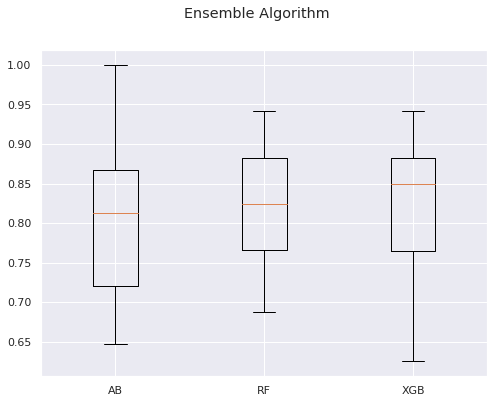

In [107]:
fig= plt.figure()
fig.suptitle('Ensemble Algorithm')
ax=fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
fig.set_size_inches(8,6)
plt.show()

In [108]:
scaler= StandardScaler().fit(X_train)
rescaledX= scaler.transform(X_train)
model= SVC(C=1.5)
model.fit(rescaledX,Y_train)

SVC(C=1.5, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [117]:
rescaledValidationX= scaler.transform(X_validation)
predictions=model.predict(rescaledValidationX)
print(accuracy_score(Y_validation, predictions))
print(confusion_matrix(Y_validation, predictions))
print(classification_report(Y_validation, predictions))

0.8333333333333334
[[18  5]
 [ 2 17]]
              precision    recall  f1-score   support

         0.0       0.90      0.78      0.84        23
         1.0       0.77      0.89      0.83        19

    accuracy                           0.83        42
   macro avg       0.84      0.84      0.83        42
weighted avg       0.84      0.83      0.83        42



In [119]:
scaler= StandardScaler().fit(X_train)
rescaledX= scaler.transform(X_train)
model2= KNeighborsClassifier(n_neighbors=1)
model2.fit(rescaledX,Y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=1, p=2,
                     weights='uniform')

In [120]:
rescaledValidationX= scaler.transform(X_validation)
predictions=model2.predict(rescaledValidationX)
print(accuracy_score(Y_validation, predictions))
print(confusion_matrix(Y_validation, predictions))
print(classification_report(Y_validation, predictions))

0.8333333333333334
[[21  2]
 [ 5 14]]
              precision    recall  f1-score   support

         0.0       0.81      0.91      0.86        23
         1.0       0.88      0.74      0.80        19

    accuracy                           0.83        42
   macro avg       0.84      0.82      0.83        42
weighted avg       0.84      0.83      0.83        42



In [121]:
scaler= StandardScaler().fit(X_train)
rescaledX= scaler.transform(X_train)
model3= RandomForestClassifier()
model3.fit(rescaledX,Y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [122]:
rescaledValidationX= scaler.transform(X_validation)
predictions=model3.predict(rescaledValidationX)
print(accuracy_score(Y_validation, predictions))
print(confusion_matrix(Y_validation, predictions))
print(classification_report(Y_validation, predictions))

0.7619047619047619
[[18  5]
 [ 5 14]]
              precision    recall  f1-score   support

         0.0       0.78      0.78      0.78        23
         1.0       0.74      0.74      0.74        19

    accuracy                           0.76        42
   macro avg       0.76      0.76      0.76        42
weighted avg       0.76      0.76      0.76        42

